**Decison tree: ** tree-like structure of nodes:

**Root Node:** Represents the entire dataset, where a feature is chosen to split the data.

**Internal Nodes:** Represent the features on which the data is split based on certain conditions (e.g., thresholds).

**Leaf Nodes:** Represent the final output (either a class label for classification or a value for regression).

The decision-making process is based on the concept of entropy or Gini impurity to measure how well the data is split at each node. The tree grows by recursively partitioning the data until either all data points belong to the same class or a stopping criterion (like depth or minimum samples) is met.

**Advantages:**
Easy to interpret and visualize.
Works well on small datasets.
Can handle both numerical and categorical data.

**Disadvantages:**
Prone to overfitting, especially on complex datasets.
Can be sensitive to small variations in the data.

In [ ]:
 # entropy - the measure of randomness in dataset
 # every split always select high information gain. but why?
#  because the goal of the tree is to create the most pure subsets of data at each step. By doing this, the model becomes better at classifying or
#  predicting outcomes as it reduces uncertainty or randomness (measured by entropy) as much as possible.

**Information Gain=Entropy (before)−Entropy (after)**

In [ ]:
import pandas as  pd
df = pd.read_csv("/content/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


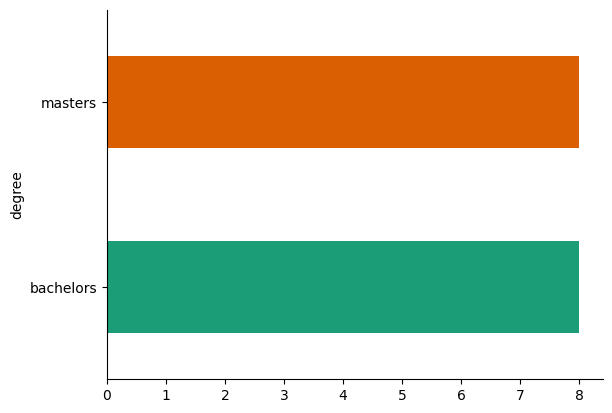

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('degree').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [ ]:
#ml algorithms can only undersatnd numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#convert columns into numbers using label encoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
pd.set_option('display.max_rows', None)
print(inputs)

       company                  job     degree  company_n  job_n  degree_n
0       google      sales executive  bachelors          2      2         0
1       google      sales executive    masters          2      2         1
2       google     business manager  bachelors          2      0         0
3       google     business manager    masters          2      0         1
4       google  computer programmer  bachelors          2      1         0
5       google  computer programmer    masters          2      1         1
6   abc pharma      sales executive    masters          0      2         1
7   abc pharma  computer programmer  bachelors          0      1         0
8   abc pharma     business manager  bachelors          0      0         0
9   abc pharma     business manager    masters          0      0         1
10    facebook      sales executive  bachelors          1      2         0
11    facebook      sales executive    masters          1      2         1
12    facebook     busine

In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n, target)
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


**In practice, the choice between Gini impurity and entropy often does not make a significant difference in the performance of decision trees. The Gini impurity is slightly faster to compute, which can be advantageous in large datasets.**

**Gini impurity measures how often a random item would be incorrectly classified, while Entropy measures the level of uncertainty or disorder in the distribution of categories.**

In [ ]:
model.score(inputs_n,target)

1.0

In [ ]:
#Is salary of Google, computer programmer, masters degree > 100 k ?
model.predict([[2, 1, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Is salary of abc pharma, Business manager, masters degree > 100 k ?
model.predict([[0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])